# Lab 8 - PyTorch

Welcome to this week's lab on PyTorch! In this lab, you are going to explore PyTorch, a popular open-source library widely used for applications such as computer vision and natural language processing. PyTorch is known for its ease of use, efficiency, and dynamic computational graph.

## Part 1: Getting Started with PyTorch
First, ensure you have PyTorch installed in your environment. You can either use a virtual environment or docker. Check out the PyTorch's installation guide: https://pytorch.org/get-started/locally/

### Basic Concepts
#### Tensors
Tensors are the fundamental unit of data in PyTorch, similar to NumPy arrays but with GPU acceleration.

In [1]:
import torch

# Create a tensor
tensor = torch.tensor([[1, 2], [3, 4]])
print(tensor)

tensor([[1, 2],
        [3, 4]])


#### Operations
Operations in PyTorch allow you to perform mathematical computations on tensors.

In [3]:
# Addition
tensor_add = tensor + 5
print(tensor_add)

# Multiplication
tensor_mul = tensor * 2
print(tensor_mul)

tensor([[6, 7],
        [8, 9]])
tensor([[2, 4],
        [6, 8]])


#### Autograd
PyTorch's automatic differentiation engine, `torch.autograd`, is one of its most powerful features, enabling the automatic computation of gradients—essential for backpropagation in neural networks.

In [12]:
# Create tensors with requires_grad=True to track computation
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()

# Compute gradients
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Find out more about the concept of gradient in the contecxt of backpropagation. Explain briefly what gradients are and how they are used in backpropagation.

Gradients are used to traack how tensors change over time. 

In Back Propagation, the gradients are computed for all tensors with back propagation using derivatives.

#### Building a Simple Model


In [ ]:
# Define a linear model
model = torch.nn.Linear(1, 1)

# Loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Check out PyTorch documentation and explain what are the inputs we provided in `torch.nn.Linear`.

## Part 2: Implement a Multi-Layer Neural Network with PyTorch

Let's build a multi-layer neural network to classify points into two categories based on their location in a 2D space. This is a step up in complexity and will help illustrate the power of deep neural networks.

### Task 1: Generate Synthetic Data
First, we need to generate some data that isn't linearly separable, which will require the expressiveness of a multi-layer network to classify correctly.

In [13]:
import torch
import numpy as np

# Generating a spiral dataset
N = 100  # number of points per class
D = 2  # dimensionality
K = 2  # number of classes
X = np.zeros((N*K, D))  # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8')  # class labels

for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N)  # radius
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

### Task 2: Define the Model
You need to define a model with two hidden layers. Each hidden layer will have a `ReLU` activation function for non-linearity. Use `Cross Entropy` as the loss function and use `Adam` as the optimizer.
    

In [15]:
# Define a simple multi-layer network
model = torch.nn.Sequential(
    torch.nn.Linear(2, 100),  # 2 inputs, to 100 neurons in the first hidden layer
    torch.nn.ReLU(),
    torch.nn.Linear(100, 50),  # Second hidden layer, 50 neurons
    torch.nn.ReLU(),
    torch.nn.Linear(50, 2)  # Output layer, 2 outputs for our classes
)

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Task 3: Train the Model
With our data and model defined, let's train the network for `1000` epochs!

In [17]:
# Train the model
# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y
    y_pred = model(X)

    # Compute loss
    loss = criterion(y_pred, y)
    
    # Zero gradients, backward pass, and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss.item()}')

Epoch 0: loss = 0.7040802240371704
Epoch 100: loss = 0.012590711005032063
Epoch 200: loss = 0.008767014369368553
Epoch 300: loss = 0.007849366404116154
Epoch 400: loss = 0.0074317362159490585
Epoch 500: loss = 0.007494852412492037
Epoch 600: loss = 0.007149717304855585
Epoch 700: loss = 0.007250743918120861
Epoch 800: loss = 0.007284240797162056
Epoch 900: loss = 0.007334150839596987


### Task 4: Evaluate the Model
To evaluate our model, we will visualize how well it separates the classes in our 2D space.

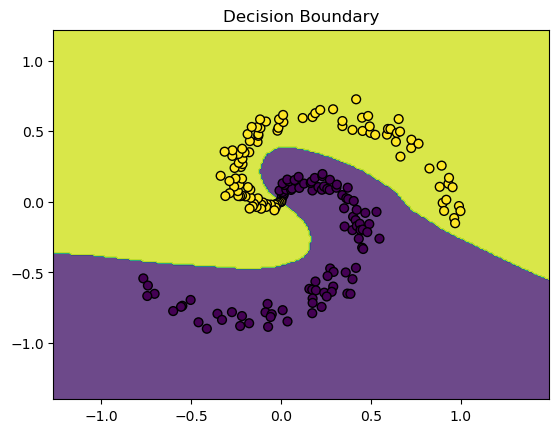

In [18]:
# We will use matplotlib to plot the decision boundary
import matplotlib.pyplot as plt

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Model prediction for a numpy array
def predict(X):
    X = torch.from_numpy(X).float()
    y_pred = model(X)
    return np.argmax(y_pred.data.numpy(), axis=1)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(x))
plt.title("Decision Boundary")
plt.show()

## Submission
Submit a link to your completed Jupyter Notebook file hosted on your private GitHub repository through the submission link in Blackboard.